In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#OPI DATA for max and min ploting 

data = pd.read_excel ("U:\\Amber Ag\ASABE 2022\Bin5_amber_raw\Bin5_hr_cable_temp.xlsx")
save_path='U:\\Amber Ag\ASABE 2022\Bin5_amber_raw\B5_hr_cable_temp_max_min'
# data = pd.read_excel ("W:\\Amber Ag\ASABE 2022\ML_Data\Merging\Ambient_Daily_temp_RH.xlsx")


In [3]:
data.head()

,Unnamed: 0,datetime_utc,Temp C1,Temp C2,Temp C3,Temp C4,Temp C5,Grain bulk
0,142,2020-11-03 16:51:00,58.60,53.72,57.625,56.26,57.28,56.697
1,143,2020-11-03 17:51:00,50.98,49.12,51.400,49.70,50.20,50.280
2,149,2020-11-04 12:28:00,70.06,67.90,68.500,69.00,68.50,68.792
3,155,2020-11-04 13:29:00,58.10,53.88,56.450,57.26,55.52,56.242
4,159,2020-11-04 14:29:00,57.62,54.90,56.375,57.66,57.04,56.719


In [4]:
# Convert datetime column to datetime datatype and clean
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])
data['datetime_utc'] = data['datetime_utc'].dt.date

# Drop unnammed column
data.drop('Unnamed: 0', axis=1,inplace=True) 

# Check queried data
data.head()

,datetime_utc,Temp C1,Temp C2,Temp C3,Temp C4,Temp C5,Grain bulk
0,2020-11-03,58.60,53.72,57.625,56.26,57.28,56.697
1,2020-11-03,50.98,49.12,51.400,49.70,50.20,50.280
2,2020-11-04,70.06,67.90,68.500,69.00,68.50,68.792
3,2020-11-04,58.10,53.88,56.450,57.26,55.52,56.242
4,2020-11-04,57.62,54.90,56.375,57.66,57.04,56.719


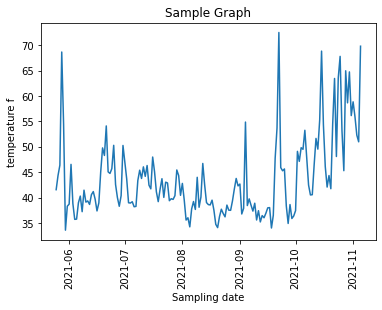

In [239]:
def plot_CO_Two(query):
    # Check if we are interested in the max values or minimum values
    if query=='min':
        # Select minimum values
        value_dates = data.loc[data.groupby('datetime_utc')['Temp C1'].idxmin()]
        file_name='Bin5_opi_hr_tempC1_min.xlsx'
    
    elif query=='max':
        # Select maximum values
        value_dates = data.loc[data.groupby('datetime_utc')['humidity_rh'].idxmax()]
        file_name='Bin16_amber_hp_rh_max.xlsx'
    # print(value_dates)    ##This is the table if you will like to print
    value_dates.to_excel(save_path+'\\'+file_name, index=False)
    plt.plot(value_dates['datetime_utc'],value_dates['humidity_rh'])

    # Adding labels and title
    plt.xlabel('Sampling date')
    plt.ylabel('temperature f')
    plt.title('Sample Graph')
    plt.xticks(rotation='vertical')
    # Display the graph
    plt.show()
    
plot_CO_Two('min')

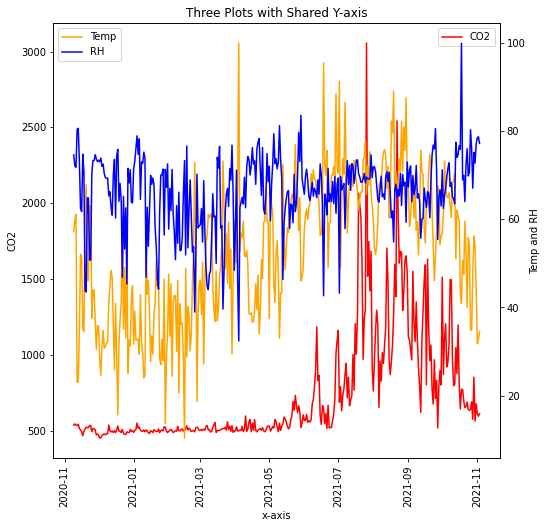

In [38]:
def plot_three(query):
    
    if query=='min':
        # Select minimum values
        value_dates = data.loc[data.groupby('datetime_utc')['co2_ppm'].idxmin()]
    
    elif query=='max':
        # Select maximum values
        value_dates = data.loc[data.groupby('datetime_utc')['co2_ppm'].idxmax()]
        
    # print(value_dates)    ##This is the table if you will like to print

    # Create figure
    fig, ax1 = plt.subplots(figsize=(8, 8))

    # Plot CO2 data
    ax1.plot(value_dates['datetime_utc'], value_dates['co2_ppm'], color='red', label='CO2')
    ax1.set_xlabel('x-axis')
    ax1.set_ylabel('CO2')

    # create another y axis and plot temp graph
    ax2 = ax1.twinx()
    ax2.plot(value_dates['datetime_utc'], value_dates['temperature_f'], color='orange', label='Temp')
    ax2.set_ylabel('Temp and RH')

    # Plot RH values using the temperature scale (ax2)
    ax2.plot(value_dates['datetime_utc'], value_dates['humidity_rh'], color='blue', label='RH')

    # Rotate values for vertical axis at 90 degree and add legends
    ax1.tick_params(axis='x', rotation=90)
    ax1.legend()
    ax2.legend()

    # Title
    plt.title('Three Plots with Shared Y-axis')
    
plot_three('max')

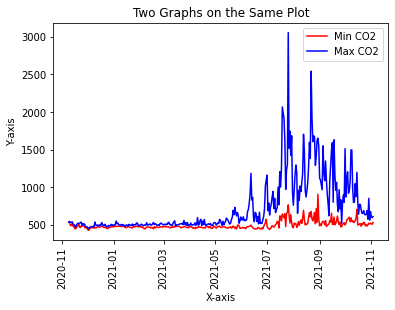

In [39]:
def plot_min_max_co():
    min_value_dates = data.loc[data.groupby('datetime_utc')['co2_ppm'].idxmin()]
    
    max_value_dates = data.loc[data.groupby('datetime_utc')['co2_ppm'].idxmax()]
   
    fig, ax = plt.subplots()

    # Plot 1
    ax.plot(min_value_dates['datetime_utc'], min_value_dates['co2_ppm'], color='red', label='Min CO2')

    # Plot 2
    ax.plot(max_value_dates['datetime_utc'], max_value_dates['co2_ppm'], color='blue', label='Max CO2')

    # Add legend
    ax.legend()

    # Set labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    plt.title('Two Graphs on the Same Plot')
    
    ax.tick_params(axis='x', rotation=90)
    # Display the plot
    plt.show()
    
plot_min_max_co()